<a href="https://colab.research.google.com/github/mrpintime/TitanicSurvivor/blob/main/Titanic_(Kaggle_Competition).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install opendatasets

In [ ]:
# !git clone https://github.com/rapidsai/rapidsai-csp-utils.git
# !python rapidsai-csp-utils/colab/pip-install.py

In [ ]:
# import opendatasets as op

In [ ]:
# op.download("https://www.kaggle.com/c/titanic")

# Dataset Description  

Variable  |	Definition   |	Key   |
----------| -----------  | -------|
survival  |	Survival     |	0 = No, 1 = Yes
pclass 	  | Ticket class 	   |1 = 1st, 2 = 2nd, 3 = 3rd
sex 	    | Sex 	
Age 	    | Age in years 	
sibsp 	  | # of siblings / spouses aboard the Titanic 	
parch 	  | # of parents / children aboard the Titanic 	
ticket 	  | Ticket number 	
fare 	    | Passenger fare 	
cabin 	  | Cabin number 	
embarked 	| Port of Embarkation |	C = Cherbourg, Q = Queenstown, S = Southampton

## **Variable Notes**

**pclass**: A proxy for socio-economic status (SES)  
**1st** = Upper  
**2nd** = Middle  
**3rd** = Lower  

`age`: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

`sibsp`: The dataset defines family relations in this way...  
**Sibling** = brother, sister, stepbrother, stepsister  
**Spouse** = husband, wife (mistresses and fiancés were ignored)

`parch`: The dataset defines family relations in this way...  
**Parent** = mother, father  
**Child** = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore `parch=0` for them.


# Problem  
The sinking of the Titanic is one of the most famous happend in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren't enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we want to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

# Import Dataset

**important note** : we have two dataset for this copetition that created by kaggle, so first we do preprocessing on train set and then we use test set for evaluation our models.

In [ ]:
# df = pd.read_csv('/content/titanic/train.csv')

# Exploratory data analysis

## Cleansing

In [2]:
import pandas as pd, numpy as np, seaborn as sns
import matplotlib.pyplot as plt


**Let's see dataset shape, columns, missing values**

it is normal dataset size  

In [ ]:
df.shape

(891, 12)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We have `177 missing values` for `Age` and `687 missing values` for `Cabin` and `2 missing values` for `Embarked`

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Let's see do we have `unique passangers` or `not (duplicate)`, if we have duplicate row we should `remove` it.  

as we can see we do not have duplicate passengers. good for us.

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.duplicated(['PassengerId']).sum()

0

We can remove the `Name` column cause we do not need it in our future analysis.   
`If you say why we do not need it, i can tell you that can you predict somthing based on the name of the person is that reasonable ?`  

In [ ]:
df = df.drop(columns=['Name'], axis=1)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


Let's check are we can remove `Ticket` column or not 

In [ ]:
df.Ticket.value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

As you can see we have `681 unique tickets` and `134` of them purchased more that once.

In [ ]:
np.sum(df.Ticket.value_counts() > 1)

134

In [ ]:
len(df.Ticket.unique())

681

So if we decide to keep it we have to convert all `681` unique tickets to numeric value and therefore if we use `get_dummies` we will have `681` extra columns with `binary` value, if we use we use `LabelEncoder` for not binary encoder we will have `681 unique values` in `one column`.  
and also there are some extra information and services that provided for passengers with their tickets that did not include in dataset. 


---


**In conclusion** we keep it for now 

Let's deal with `nan` values in `Age`, `Embarked` and `Cabin` columns.

In [ ]:
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,female,62.0,0,0,113572,80.0,B28,NaN


one approache to dealing with `nan` values is replace it with somthing reasonable. so we can use most ferquent value in `Embarked` and replace it with `NAN` value.   

In [ ]:
df.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [ ]:
df[(df['Fare'] == 80)]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,female,62.0,0,0,113572,80.0,B28,NaN


As we can see `S` has more frequent for fare bellow than `120`,  also more in overall, and also because we have only two nan value for `Embarked` we can set them to `S`.

<Axes: xlabel='Embarked', ylabel='Fare'>

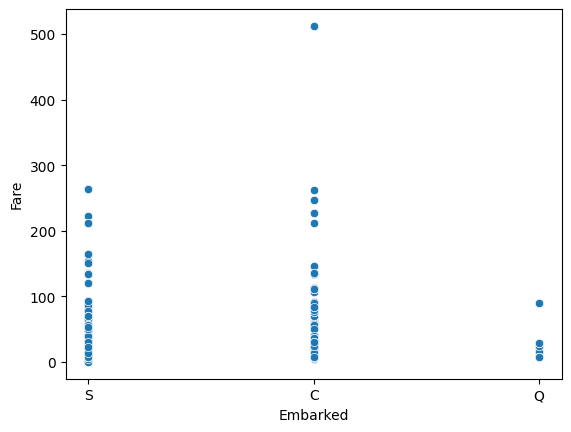

In [ ]:
sns.scatterplot(df[['Fare', 'Embarked']], x='Embarked', y='Fare')

In [ ]:
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,female,62.0,0,0,113572,80.0,B28,NaN


In [ ]:
df.loc[[61,829],['Embarked']] = np.array(['S', 'S'])

In [ ]:
df.loc[[61,829],['Embarked']]

,Embarked
61,S
829,S


Let's check `Cabin` column.

In [ ]:
df.Cabin.isnull().sum()

687

In [ ]:
df[df.Cabin.isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [ ]:
df.Cabin.describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [ ]:
np.sum(df[['Cabin','Ticket']][df.Cabin.isnull()]['Ticket'].value_counts() > 1)

82

In [ ]:
df.Cabin.isnull().sum() / df.shape[0]

0.7710437710437711

So as you can see it is not so easy if we want to replace `687` nan values with reasonable values also it is not good if we want to replace these numbers of data with nan values cause it makes our dataset to has bias as we see `77 percent` of all data in Cabin column are missing value so we use can do two thing:

1.   remove rows that contain `nan` value for `Cabin` column.
2.   remove `Cabin` column from our dataset

---
we choose second one because we do not want to loose so much information from other columns.


In [ ]:
df = df.drop(columns=['Cabin'], axis=1)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S


Let's Check `Age` column.

In [ ]:
df.Age.isnull().sum()

177

In [ ]:
df[df.Age.isnull()].head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,male,NaN,0,0,330877,8.4583,Q
17,18,1,2,male,NaN,0,0,244373,13.0000,S
19,20,1,3,female,NaN,0,0,2649,7.2250,C
26,27,0,3,male,NaN,0,0,2631,7.2250,C
28,29,1,3,female,NaN,0,0,330959,7.8792,Q


In [ ]:
df[df.Age.isnull()].Embarked.value_counts()

S    90
Q    49
C    38
Name: Embarked, dtype: int64

In [ ]:
df[df.Age.isnull()].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,177.000000,177.000000,177.000000,0.0,177.000000,177.000000,177.000000
mean,435.581921,0.293785,2.598870,NaN,0.564972,0.180791,22.158567
std,250.552901,0.456787,0.763216,NaN,1.626316,0.534145,31.874608
min,6.000000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000
25%,230.000000,0.000000,3.000000,NaN,0.000000,0.000000,7.750000
50%,452.000000,0.000000,3.000000,NaN,0.000000,0.000000,8.050000
75%,634.000000,1.000000,3.000000,NaN,0.000000,0.000000,24.150000
max,889.000000,1.000000,3.000000,NaN,8.000000,2.000000,227.525000


In [ ]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
df[(df.Age.isnull()) & (df.Parch==0)]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,male,NaN,0,0,330877,8.4583,Q
17,18,1,2,male,NaN,0,0,244373,13.0000,S
19,20,1,3,female,NaN,0,0,2649,7.2250,C
26,27,0,3,male,NaN,0,0,2631,7.2250,C
28,29,1,3,female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...
839,840,1,1,male,NaN,0,0,11774,29.7000,C
849,850,1,1,female,NaN,1,0,17453,89.1042,C
859,860,0,3,male,NaN,0,0,2629,7.2292,C
868,869,0,3,male,NaN,0,0,345777,9.5000,S


<Axes: xlabel='Age', ylabel='SibSp'>

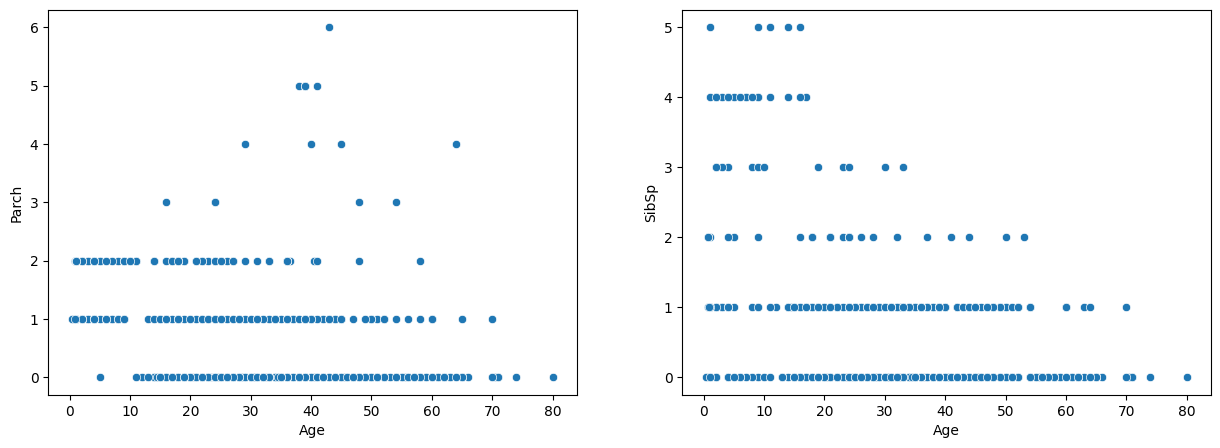

In [ ]:
plt.figure(figsize=(15,5))
ax1 = plt.subplot(1,2,1)
sns.scatterplot(data=df, x='Age', y='Parch', ax=ax1)
ax2 = plt.subplot(1,2,2)
sns.scatterplot(data=df, x='Age', y='SibSp',ax=ax2)

In [ ]:
df[(df.Age.isnull())].Parch.value_counts()

0    157
2     12
1      8
Name: Parch, dtype: int64

In [ ]:
df[(df.Age.isnull()) & (df.SibSp==0)].Parch.value_counts()

0    133
2      3
1      1
Name: Parch, dtype: int64

In [ ]:
df[(df.Age.isnull()) & (df.Parch==0)].SibSp.value_counts()

0    133
1     21
2      3
Name: SibSp, dtype: int64

In [ ]:
df[(df.Parch==0) & (df.SibSp==0)].Age.describe()

count    404.000000
mean      32.220297
std       12.899871
min        5.000000
25%       22.000000
50%       29.500000
75%       39.000000
max       80.000000
Name: Age, dtype: float64

we have `177` numbers of nan values that `133` of them have `Parch and SibSp equal to Zero`.

In [ ]:
mask = ~((df.Parch==0) & (df.SibSp==0))

In [ ]:
df[mask].Age.describe()

count    310.000000
mean      26.413452
std       15.834923
min        0.420000
25%       16.000000
50%       26.000000
75%       37.000000
max       70.000000
Name: Age, dtype: float64

we have some insight here lets explore more

<Axes: xlabel='Parch', ylabel='Count'>

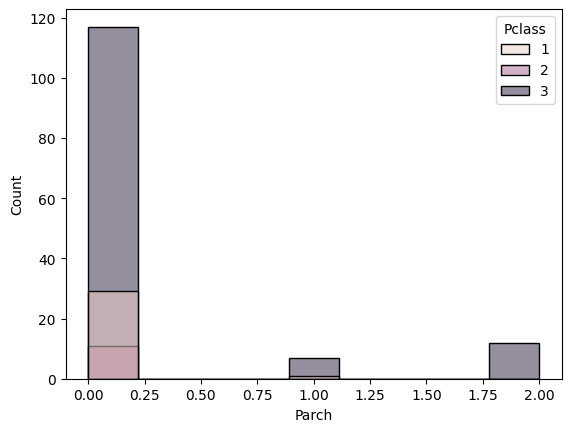

In [ ]:
sns.histplot(data=df[(df.Age.isnull())], x='Parch', hue='Pclass')

<Axes: xlabel='Pclass', ylabel='Count'>

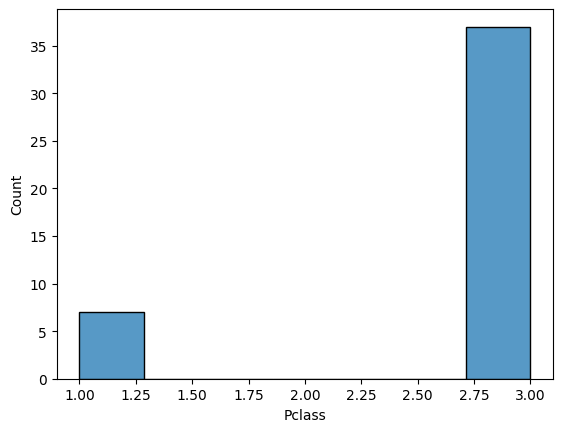

In [ ]:
sns.histplot(data=df[(df.Age.isnull()) & mask], x='Pclass')

Let's use mean of age in there that Parch, SbSip are zero.

**Note**: we can use `clustering` to find a value to replace with `nan` values but we do it in another version of this notebook.

In [ ]:
df[(df.Parch==0) & (df.SibSp==0)].Age.describe()

count    404.000000
mean      32.220297
std       12.899871
min        5.000000
25%       22.000000
50%       29.500000
75%       39.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
df = df.fillna(value='32', axis=1)

so check dataset missing values for another once 

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**Done for now**  
we can use another method to fill the missing values

In [ ]:
# Save semi-preprocessed dataset
# df.to_csv("/content/drive/MyDrive/Titanic/semi-preprocessed.csv", index=False)

In [ ]:
# Read the dataset
# df = pd.read_csv("/content/drive/MyDrive/Titanic/semi-preprocessed.csv")

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S


**we can normalize the Tickets column but for we passed it like this**

Let's do the pairwise plot

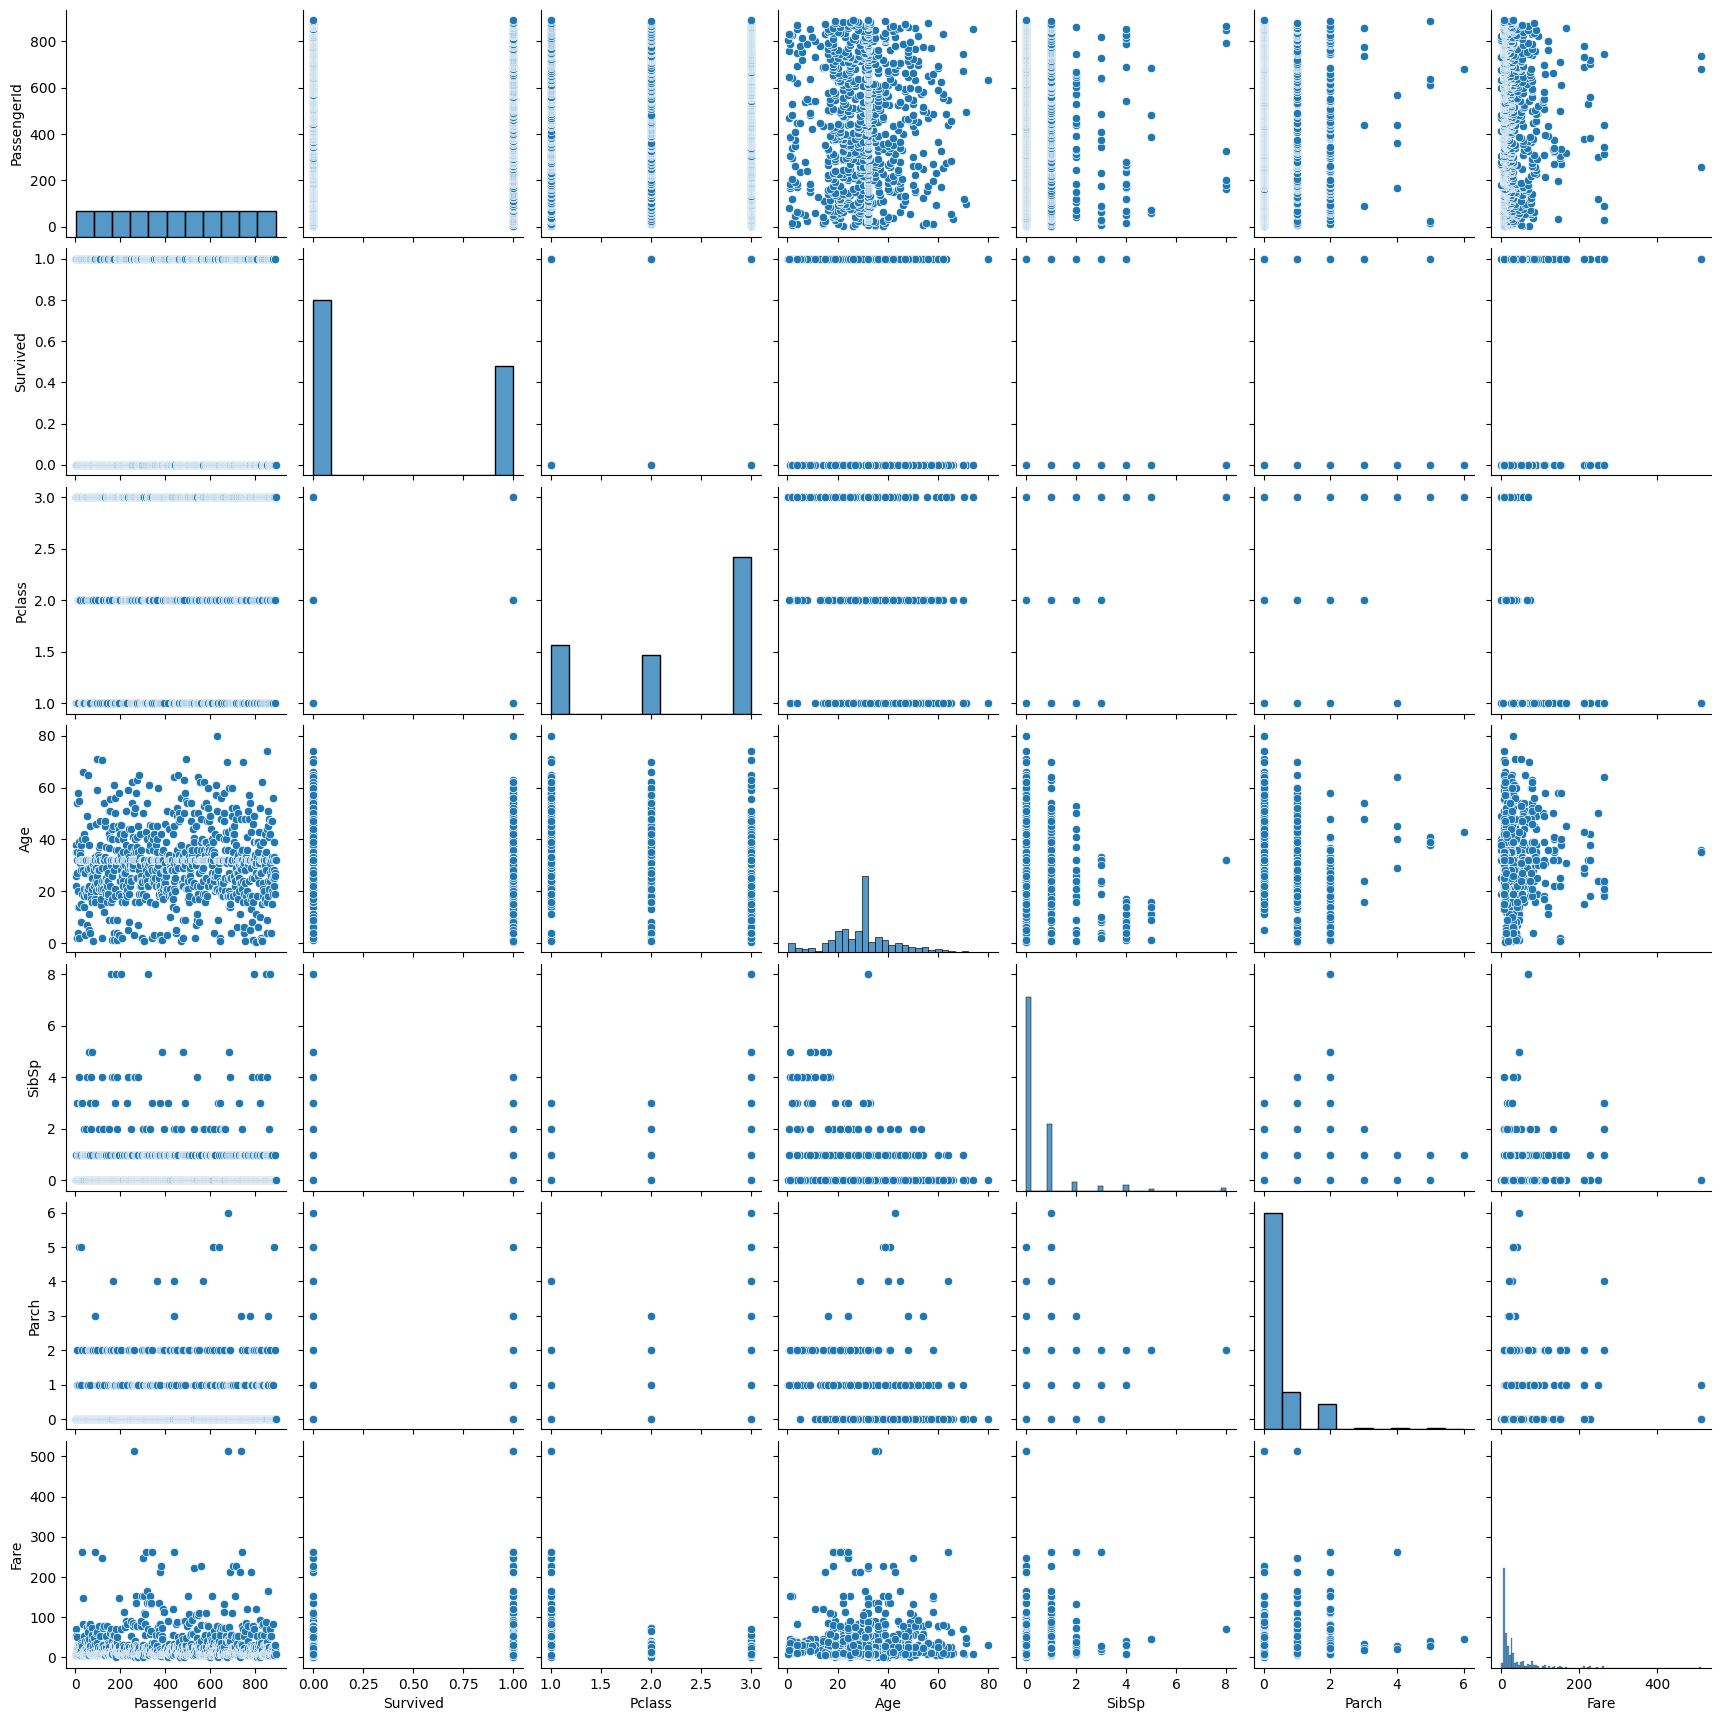

In [ ]:
sns.pairplot(df)

Lets check pearson correlation.

<Axes: >

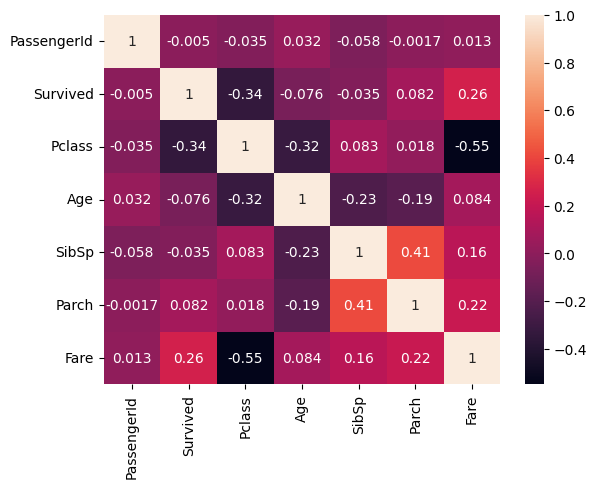

In [ ]:
cm = df.corr(numeric_only=True)
sns.heatmap(cm, annot=True)

There were four main thing that we should pay attention:


1.   No `significatnt prearson correlation` with `Survived variable` greater or lower than 0.5, -0.5.
2.   we can see relation between variables `Fare` and `Pclass`, `Sibsp` , `Survived` in  pearson correlation and also confirm it with pairplot.
3.   in pariplot diagram in plot of `Age` and `Passenger id` we can see a blue line from up to down (age in x-axis), this is because we replace all `missing values` of `age` with mean, and if you see for further analysis we can select the number for missing values of `age` randomly from highly dense area of   `Age` and `Passenger id` plot  
3.   **it seems there were `outliers` in dataset.**





Somthing else is that we should remove `passenger id` column or replace it as index of dataset because it contains unique value for each row.  
I decided to remove it.  
Remember: `index + 1 = passenger id`

In [ ]:
df = df.drop(columns=['PassengerId'],axis=1)

In [ ]:
# Save semi-preprocessed dataset
# df.to_csv("/content/drive/MyDrive/Titanic/semi-preprocessed.csv", index=False)

In [3]:
# Read the dataset
df = pd.read_csv("/content/drive/MyDrive/Titanic/semi-preprocessed.csv")

In [4]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


**Good Let's do some prepration for predictive analysis**

# Predictive Analysis

## Preprocessing

Label Encoding

In [5]:
from sklearn.preprocessing import LabelEncoder

encoding_s = LabelEncoder().fit_transform(df['Sex'])
df['Sex'] = encoding_s

encoding_e = LabelEncoder().fit_transform(df['Embarked'])
df['Embarked'] = encoding_e

encoding_t = LabelEncoder().fit_transform(df['Ticket'])
df['Ticket'] = encoding_t


In [6]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,523,7.2500,2
1,1,1,0,38.0,1,0,596,71.2833,0
2,1,3,0,26.0,0,0,669,7.9250,2
3,1,1,0,35.0,1,0,49,53.1000,2
4,0,3,1,35.0,0,0,472,8.0500,2


Let's check we need to scaling the data or not.

In [7]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,30.156195,0.523008,0.381594,338.528620,32.204208,1.536476
std,0.486592,0.836071,0.477990,13.034420,1.102743,0.806057,200.850657,49.693429,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,158.500000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,32.000000,0.000000,0.000000,337.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,519.500000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,2.000000


yes we need if you look at the `mean` and `std` parameters based on `central tendency parameters` we need scaling for our algorithms 

Let's Check balance of Target variable.  

---



---


As you can see it is good balance, and we know that in binary classification if we want to predict badly it will be 50 50 like tossing the coin and here we have `62 percent chance` to predict `0` and `38 percent chance` to predict `1`, so we create an algorithm to predict it with much higher percent.

In [10]:
y.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

## Create Models

Lets split our set to `validation` and `train` set

In [26]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [27]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, test_size=0.3, random_state=0)

In [28]:
X_train.shape, X_valid.shape

((623, 8), (268, 8))

**Scaler Note**: we do not scale target variable.

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_valid = scaler.transform(X_valid)

### Logistic Regression

In [31]:
# model
from sklearn.linear_model import LogisticRegression
# tuning
from sklearn.model_selection import cross_validate, GridSearchCV
# metrics
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support, classification_report, confusion_matrix


Lets create a simple model without tunning

In [32]:
logis = LogisticRegression()
logis.fit(X_train, y_train.values.ravel())

pred = logis.predict(X_valid)

print(classification_report(y_true=y_valid, y_pred=pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       165
           1       0.79      0.70      0.74       103

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268



Not too bad.  
as we can see we have many `False Negative` and this is weakness of our logistic model and we should fight with it with `tuning` or `features engineering`.

<Axes: >

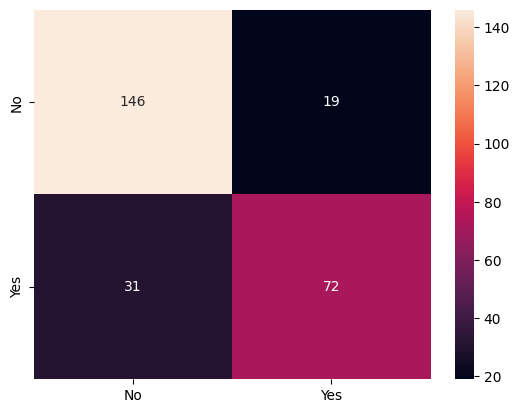

In [33]:
cm = confusion_matrix(y_true=y_valid, y_pred=pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['No','Yes'], yticklabels=['No','Yes'])

Let's do some hyperparameters tuning

In [34]:
logis = LogisticRegression(solver='liblinear', max_iter=1000)

params = {'C':[2*n for n in range(1,20)], 'penalty':['l1', 'l2']}

gr_logis = GridSearchCV(estimator=logis, param_grid=params, cv=3, n_jobs=-1)
gr_logis.fit(X_train, y_train.values.ravel())

gr_logis.best_params_, gr_logis.best_score_

({'C': 32, 'penalty': 'l1'}, 0.7913724761550848)

In [49]:
pred = gr_logis.predict(X_valid)

print(classification_report(y_true=y_valid, y_pred=pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       165
           1       0.79      0.70      0.74       103

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268



<Axes: >

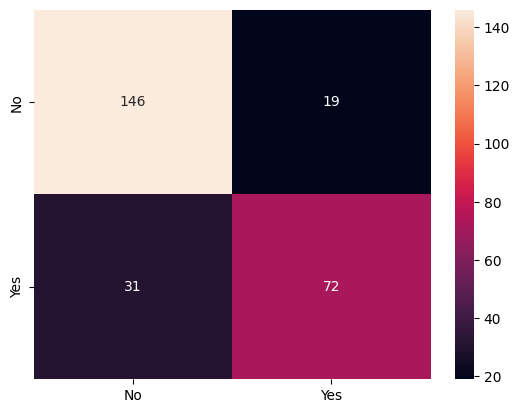

In [50]:
cm = confusion_matrix(y_true=y_valid, y_pred=pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['No','Yes'], yticklabels=['No','Yes'])

### SVC

In [36]:
from sklearn.svm import SVC

In [37]:
svc = SVC()

params = {'C':[0.2*n for n in range(1,20)], 'kernel':['linear', 'rbf', 'sigmoid', 'poly'], 'degree':[2,3,4]}

gr_svc = GridSearchCV(estimator=svc, param_grid=params, cv=3, n_jobs=-1)
gr_svc.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.2, 0.4, 0.6000000000000001, 0.8, 1.0,
                               1.2000000000000002, 1.4000000000000001, 1.6, 1.8,
                               2.0, 2.2, 2.4000000000000004, 2.6,
                               2.8000000000000003, 3.0, 3.2, 3.4000000000000004,
                               3.6, 3.8000000000000003],
                         'degree': [2, 3, 4],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']})

In [38]:
gr_svc.best_params_, gr_svc.best_score_

({'C': 2.6, 'degree': 2, 'kernel': 'poly'}, 0.826652111978199)

In [39]:
cs = cross_validate(X=X, y=y, estimator=gr_svc.best_estimator_, return_train_score=True, verbose=True, cv=3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished


In [40]:
cs

{'fit_time': array([0.01642466, 0.01078916, 0.01557493]),
 'score_time': array([0.00432634, 0.00474501, 0.00429559]),
 'test_score': array([0.63299663, 0.61616162, 0.64309764]),
 'train_score': array([0.63468013, 0.64478114, 0.61616162])}

In [41]:
cs['test_score'].mean()

0.6307519640852974

In [51]:
pred = gr_svc.best_estimator_.predict(X_valid)

print(classification_report(y_valid, pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       165
           1       0.83      0.71      0.76       103

    accuracy                           0.83       268
   macro avg       0.83      0.81      0.82       268
weighted avg       0.83      0.83      0.83       268



<Axes: >

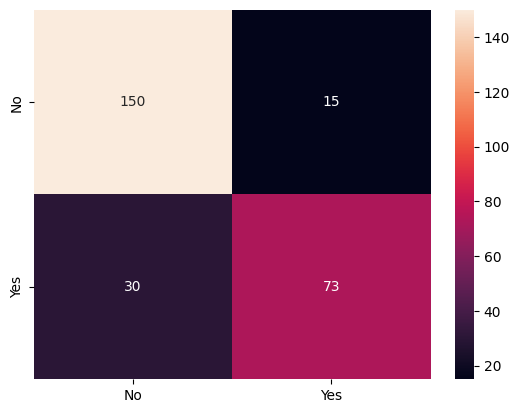

In [52]:
cm = confusion_matrix(y_true=y_valid, y_pred=pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['No','Yes'], yticklabels=['No','Yes'])

Little more better performance than Logistic Regression

### KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
knn = KNeighborsClassifier()

params = {'n_neighbors':[2*(n+1) for n in range(20)], 'p':[1,2], 
          'metric':['manhattan', 'nan_euclidean','l1','l2','euclidean','cityblock','cosine']}

gr_knn = GridSearchCV(knn, params, n_jobs=-1)

gr_knn.fit(X_train, y_train.values.ravel())



GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['manhattan', 'nan_euclidean', 'l1', 'l2',
                                    'euclidean', 'cityblock', 'cosine'],
                         'n_neighbors': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22,
                                         24, 26, 28, 30, 32, 34, 36, 38, 40],
                         'p': [1, 2]})

In [47]:
gr_knn.best_params_, gr_knn.best_score_

({'metric': 'manhattan', 'n_neighbors': 6, 'p': 1}, 0.8138193548387097)

In [53]:
pred = gr_knn.predict(X_valid)

print(classification_report(y_valid, pred))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85       165
           1       0.84      0.60      0.70       103

    accuracy                           0.80       268
   macro avg       0.81      0.76      0.78       268
weighted avg       0.81      0.80      0.79       268



<Axes: >

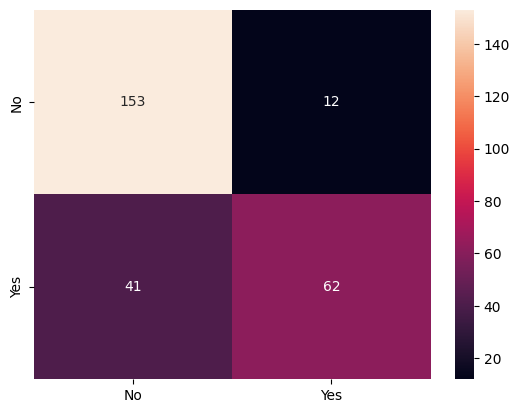

In [54]:
cm = confusion_matrix(y_true=y_valid, y_pred=pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['No','Yes'], yticklabels=['No','Yes'])

**Same like previous!!!**

### Boosting

#### RandomForest

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rf = RandomForestClassifier(bootstrap=True, warm_start=True)

params = {'n_estimators':[100,200,400], 'criterion':['gini'], 
          'max_depth':[10,20,30], 'max_features':[None], 'min_samples_leaf':[1,2,3]}

gr_rf = GridSearchCV(rf, params, n_jobs=-1)

gr_rf.fit(X_train, y_train.values.ravel())



GridSearchCV(estimator=RandomForestClassifier(warm_start=True), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [10, 20, 30],
                         'max_features': [None], 'min_samples_leaf': [1, 2, 3],
                         'n_estimators': [100, 200, 400]})

In [60]:
gr_rf.best_params_, gr_rf.best_score_

({'criterion': 'gini',
  'max_depth': 20,
  'max_features': None,
  'min_samples_leaf': 2,
  'n_estimators': 100},
 0.8363354838709677)

In [61]:
pred = gr_rf.predict(X_valid)

print(classification_report(y_valid, pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       165
           1       0.85      0.68      0.76       103

    accuracy                           0.83       268
   macro avg       0.84      0.80      0.81       268
weighted avg       0.83      0.83      0.83       268



<Axes: >

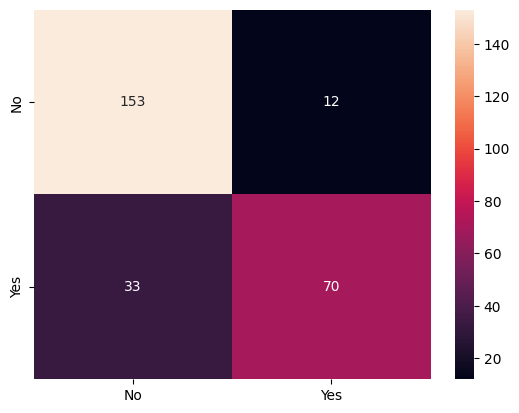

In [62]:
cm = confusion_matrix(y_true=y_valid, y_pred=pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['No','Yes'], yticklabels=['No','Yes'])

#### GBoost

In [64]:
from sklearn.ensemble import GradientBoostingClassifier

In [76]:
gb = GradientBoostingClassifier(loss='log_loss', warm_start=True)

params = {'n_estimators':[100,200,400], 
          'max_depth':[10,20,30], 'min_samples_leaf':[1,2,3],
          'learning_rate':[0.1,1,2,4,10]}

gr_gb = GridSearchCV(gb, params, n_jobs=-1)

gr_gb.fit(X_train, y_train.values.ravel())

GridSearchCV(estimator=GradientBoostingClassifier(warm_start=True), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 1, 2, 4, 10],
                         'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 3],
                         'n_estimators': [100, 200, 400]})

In [77]:
gr_gb.best_params_, gr_gb.best_score_

({'learning_rate': 2,
  'max_depth': 10,
  'min_samples_leaf': 1,
  'n_estimators': 100},
 0.8331483870967741)

In [78]:
pred = gr_gb.predict(X_valid)

print(classification_report(y_valid, pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       165
           1       0.74      0.71      0.72       103

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



<Axes: >

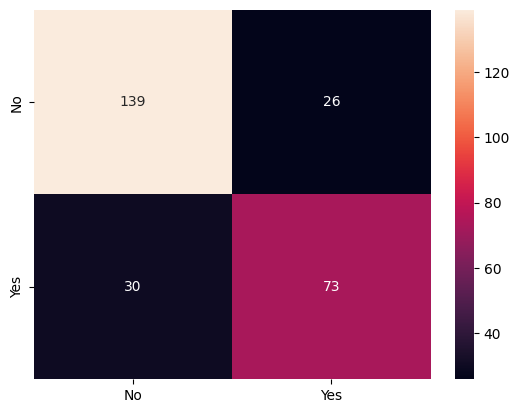

In [79]:
cm = confusion_matrix(y_true=y_valid, y_pred=pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['No','Yes'], yticklabels=['No','Yes'])

### Bagging

We want to use bagging classifier with `SVC` as base estimator

In [70]:
from sklearn.ensemble import BaggingClassifier

In [72]:
base_estm = gr_svc.best_estimator_

bc = BaggingClassifier(estimator=base_estm, bootstrap=True, warm_start=True)

params = {'n_estimators':[60,100,200,400]}

gr_bc = GridSearchCV(bc, params, n_jobs=-1)

gr_bc.fit(X_train, y_train.values.ravel())

GridSearchCV(estimator=BaggingClassifier(estimator=SVC(C=2.6, degree=2,
                                                       kernel='poly'),
                                         warm_start=True),
             n_jobs=-1, param_grid={'n_estimators': [60, 100, 200, 400]})

In [73]:
gr_bc.best_params_, gr_bc.best_score_

({'n_estimators': 100}, 0.8185806451612903)

In [74]:
pred = gr_bc.predict(X_valid)

print(classification_report(y_valid, pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87       165
           1       0.82      0.71      0.76       103

    accuracy                           0.83       268
   macro avg       0.83      0.81      0.81       268
weighted avg       0.83      0.83      0.83       268



<Axes: >

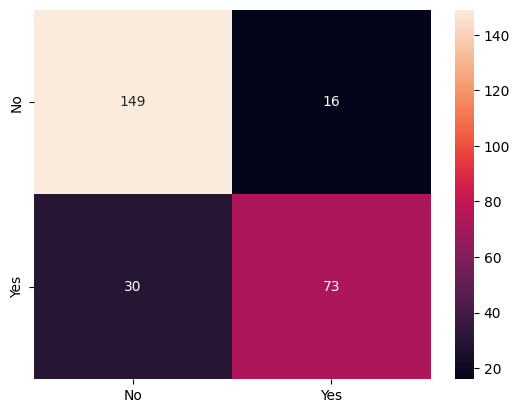

In [75]:
cm = confusion_matrix(y_true=y_valid, y_pred=pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['No','Yes'], yticklabels=['No','Yes'])

# Conclusion for now :  
as we can see we create 5 models and approximately took same results for them, there are two things:  

1. we can see one rule that says choose simple model with same result
2. we need to do some extra feature engeeniering on dataset to get better result